<a href="https://colab.research.google.com/github/izabayoleonce/scrapingLearning/blob/master/ProjetScrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bs4
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install requests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
baseUrl = "https://www.boulanger.com"
URL = baseUrl+"/c/tous-les-ordinateurs-portables"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"}
response = requests.get(URL, headers=headers)
soup = BeautifulSoup(response.content,"html.parser")

In [ ]:
soup

In [3]:
resultat = soup.find("main", id="main")

In [4]:
Pagination=resultat.find("ul", class_="paginator")
article = resultat.find_all("a", class_="grid product-list__product")
links = resultat.find_all("a", class_="analytic-track-origin")

In [5]:
artURL = [baseUrl+ link['href'] for link in links]
artURL = list(set(artURL))

In [ ]:
allArticleInfo = []
for url in artURL:
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    article = soup.find("article", class_="product__content")
    infoA = article.find("section", class_="keypoints keypoints--with-background")
    item = article.find("li", class_="keypoints__item").contents[0].strip()
    print(item)
    if item.startswith("Ecran :"):
      taille_ecran = item[8:].strip()
    elif item.startswith("Processeur :"):
      processeur = item[13:].strip()
    else:
      processeur = "none"

    names = article.find_all("h1", class_="product__label")
    price = article.find("p", class_="price__amount").contents[0].strip()
    if article.find(class_="price__crossed"):
      discount = article.find(class_="price__crossed").contents[0].strip()
    else:
      discount = ""
    rating = article.find("bl-rating")
    rating = rating['rating']
    lst_name = article.find("h1", class_="product__label").contents[0].strip()
    end_name = article.find("h1", class_="product__label").contents[2].strip()
    #print(discount)
    for h1_tag in names:
      name_mid = h1_tag.find("a").get_text(strip=True)
      name = name_mid+" "+end_name
      #print(name)
    allArticleInfo.append((name,discount,price,rating,processeur,taille_ecran))

In [ ]:
allArticleInfo

In [ ]:
df=pd.DataFrame(allArticleInfo,columns=["nom","prix_base","prix","note","processeur","ecran"])
df.to_json("date.json")

<ipython-input-34-907b08a3ee93>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='processeur', y='note', data=df, ci=None)


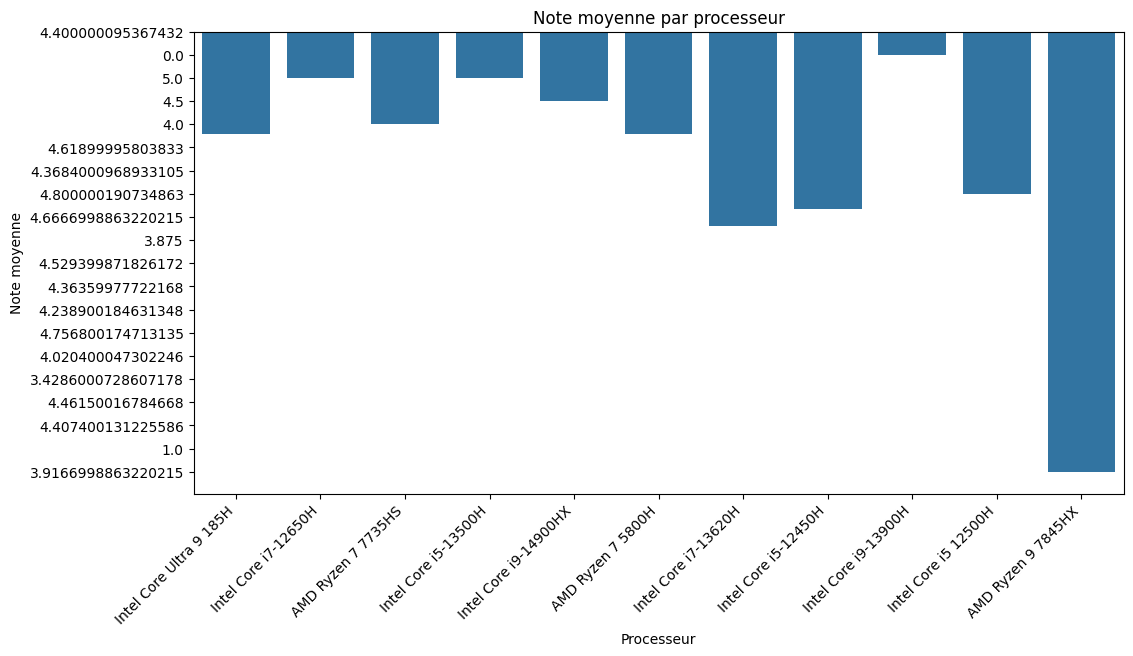

In [ ]:
# @title # Diagramme à barres de la note moyenne par processeur
plt.figure(figsize=(12, 6))
sns.barplot(x='processeur', y='note', data=df, ci=None)
plt.title('Note moyenne par processeur')
plt.xlabel('Processeur')
plt.ylabel('Note moyenne')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# @title Histogramme des prix
plt.figure(figsize=(21, 6))
plt.hist(df['prix'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

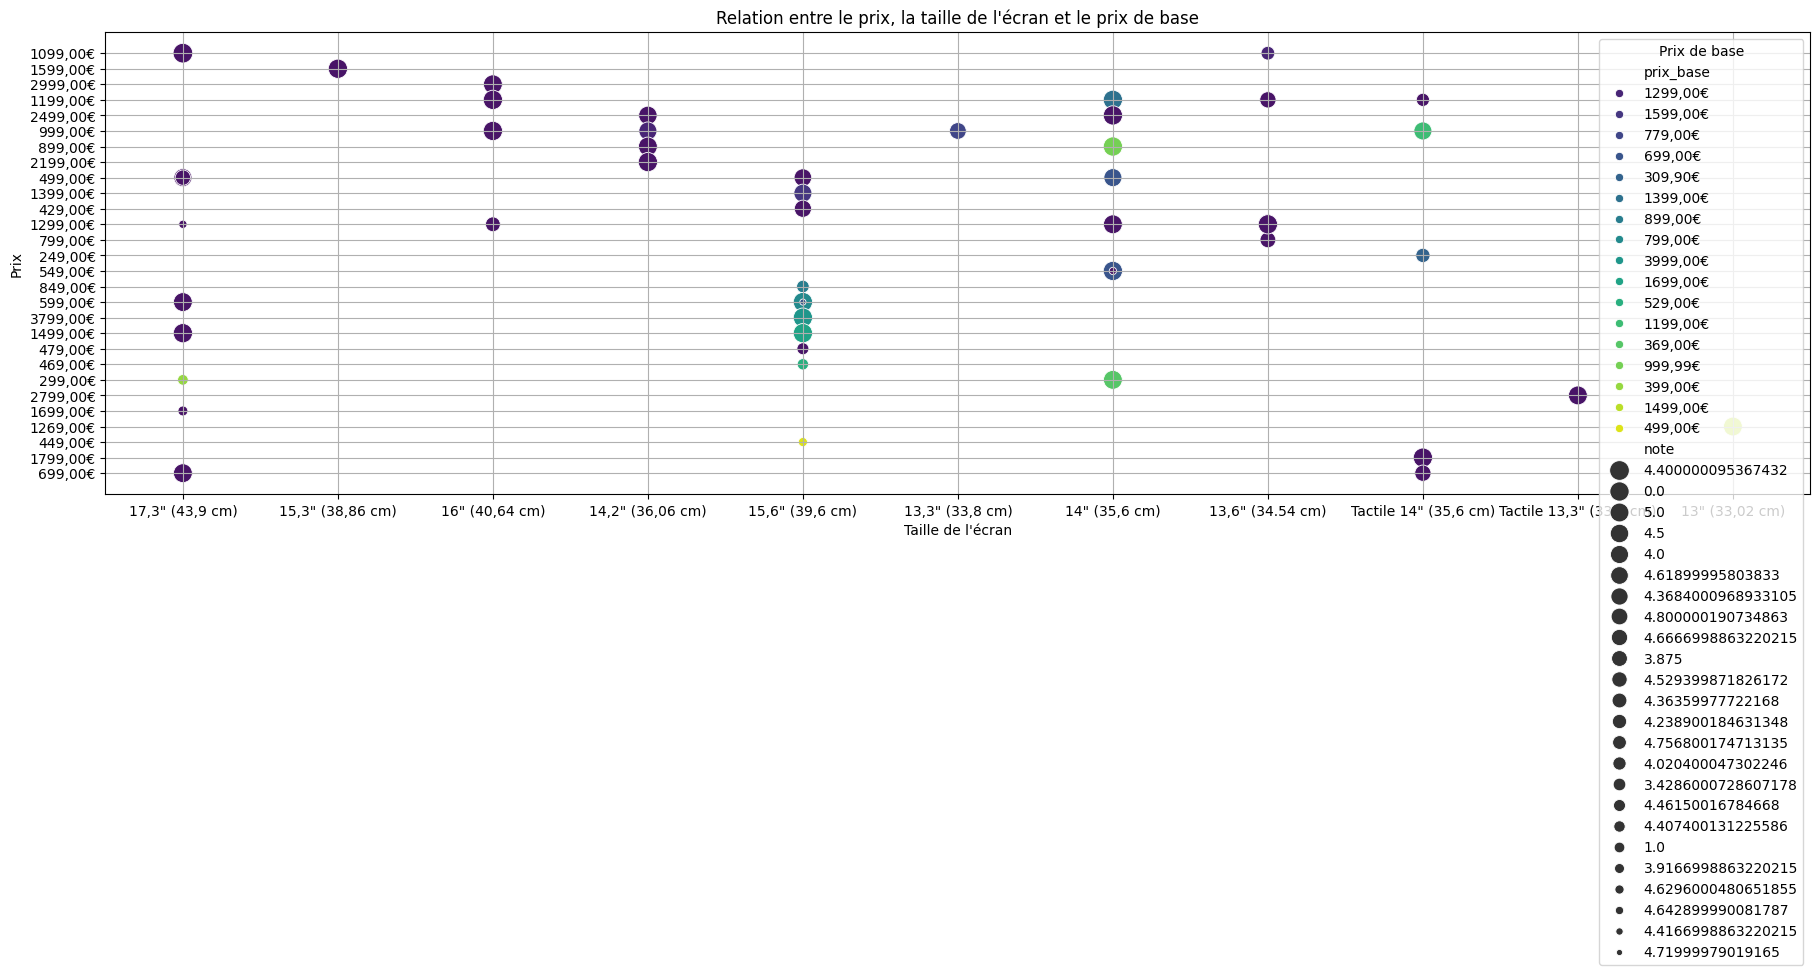

In [ ]:
# @title Nuage de points pour visualiser la relation entre le prix et la taille de l'écran
plt.figure(figsize=(22, 6))
sns.scatterplot(x='ecran', y='prix', data=df, hue='prix_base', palette='viridis', size='note', sizes=(20, 200))
plt.title('Relation entre le prix, la taille de l\'écran et le prix de base')
plt.xlabel('Taille de l\'écran')
plt.ylabel('Prix')
plt.legend(title='Prix de base')
plt.grid(True)
plt.show()

il n'y a pas de corrélation en le prix l'écran

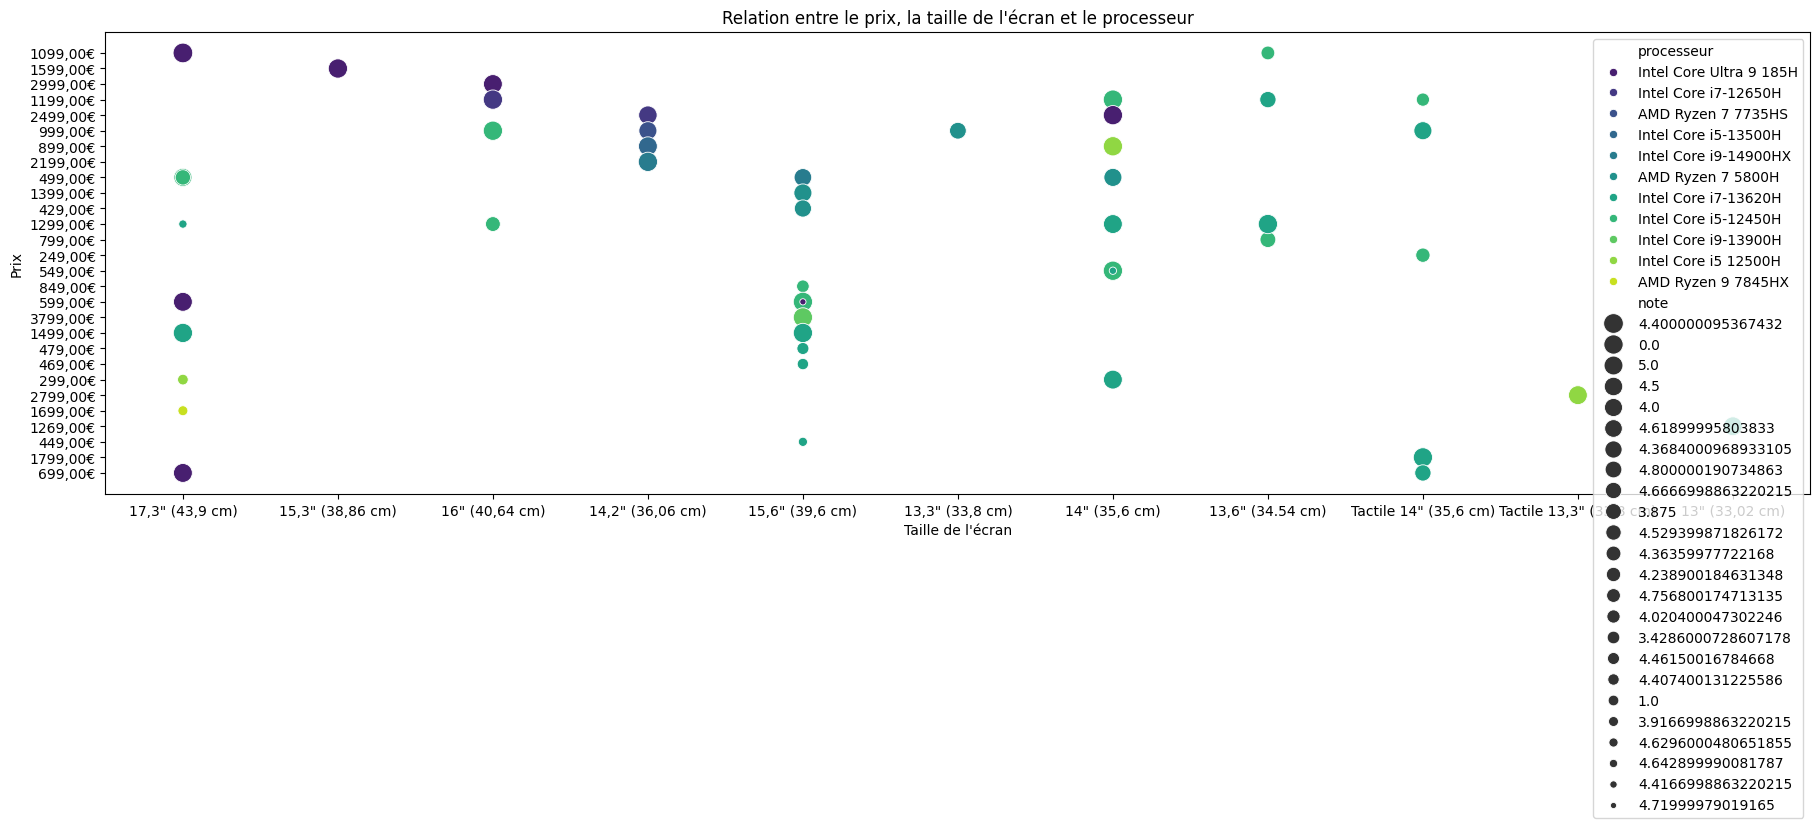

In [ ]:
# @title Nuage de points pour visualiser la relation entre le prix et le processeur et la taille de l'écran
plt.figure(figsize=(22, 6))
sns.scatterplot(x='ecran', y='prix', data=df, hue='processeur', palette='viridis', size='note', sizes=(20, 200))
plt.title('Relation entre le prix, la taille de l\'écran et le processeur')
plt.xlabel('Taille de l\'écran')
plt.ylabel('Prix')
plt.show()